<div class="output_png output_subarea output_execute_result">
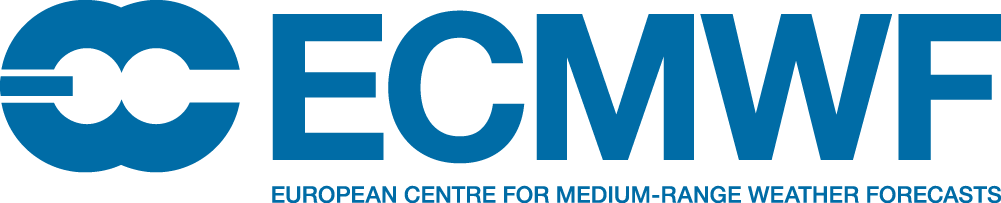
</div>

# Probabilities: total precipitation (day 10-15)

This notebook will provide you guidance how to explore and plot ECMWF open dataset to produce the map from the ECMWF open charts web product.  
The original product can be found on this link: https://charts.ecmwf.int/products/medium-tp-long-probability 


<div class="output_png output_subarea output_execute_result">
<center>
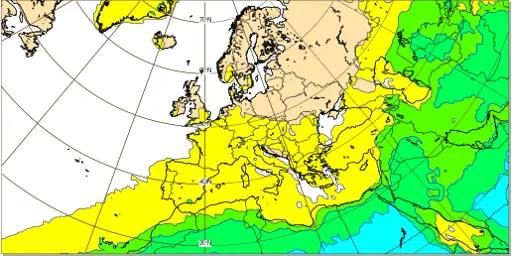
</div>

Some ECMWF real-time products are governed by the [ECMWF Standard Licence Agreement](https://www.ecmwf.int/sites/default/files/ECMWF_Standard_Licence.pdf) and are not free or open. Access to these products depends on your use case. To find out which licence applies to you, please visit: [Use cases and licence conditions page](https://www.ecmwf.int/en/forecasts/accessing-forecasts/licences-available).  

To find out how to obtain the access to the ECMWF forecast data please visit our [Access page](https://www.ecmwf.int/en/forecasts/accessing-forecasts).

## Retrieve Data
This product takes in input one of 4 parameters :

* [Total precipitation less than 0.1 mm](https://codes.ecmwf.int/grib/param-db/131064)
* [Total precipitation rate less than 1 mm/day](https://codes.ecmwf.int/grib/param-db/131065)
* [Total precipitation rate of at least 3 mm/day](https://codes.ecmwf.int/grib/param-db/131066)
* [Total precipitation rate of at least 5 mm/day](https://codes.ecmwf.int/grib/param-db/131067)

In this example, we will use: 
- [**ecmwf-api-client**](https://pypi.org/project/ecmwf-api-client/) to download the data
- [**Metview**](https://metview.readthedocs.io/en/latest/) library to read, process and plot the data 

First we need to install them in the current Jupyter kernel:  
<div class="alert alert-block alert-info">
<b>Note:</b> If you are running the notebook on MyBinder or already have the libraries installed, go directly to importing the libraries.
</div>
<div class="alert alert-block alert-info">
<b>Note:</b> If you don't have these libraries installed, click on three dots below, uncomment the code and run the next two cells.
</div>

In [1]:
#!pip install ecmwf-api-client

In [1]:
#!conda install metview metview-python

In [1]:
import metview as mv
from ecmwfapi import *
import requests

In [2]:
filename = 'medium-tp-long-probability.grib'

<div class="alert alert-block alert-success">
Note that this parameter has slightly different step than most of other parameters.  
Since this parameter is probability for the total precipitation bigger than a threshold in a 24 hours period, the step is interval between the beginning and the end of the period.
</div>

If you already have the access to the ECMWF archived forecast data, you can use the next cell to download data from the [MARS archive](https://confluence.ecmwf.int/display/UDOC/MARS+user+documentation):

Setting date to 0 will download today's data. 
Removing date and time altogether from the request will download the latest data.  
Try commenting out date and time to download latest forecast!

In [ ]:
server = ECMWFService("mars")
server.execute(
    {
    "class": "od",
    "date": "-1",
    "expver": "1",
    "levtype": "sfc",
    "param": "131064/131065/131066/131067",
    "step": "240-360",
    "stream": "enfo",
    "time": "00",
    "type": "ep",
    "grid": "0.25/0.25"
    },
    filename)

Alternatively we have prepared small sample dataset to explore

In [3]:
url = f"https://sites.ecmwf.int/repository/opencharts-sample-data/{filename}"
r = requests.get(url)
with open(filename, 'wb') as file:
    file.write(r.content)

## Reading and processing the data
Now we can use **Metview's read() function** to read the file.

In [4]:
data = mv.read(filename)

The **describe()** function will give us the overview of the dataset.  

In [5]:
data.describe()

parameter,typeOfLevel,level,date,time,step,paramId,class,stream,type,experimentVersionNumber
tpl01,surface,0,20250727,0,360,131064,od,enfo,ep,0001
tprg3,surface,0,20250727,0,360,131066,od,enfo,ep,0001
tprg5,surface,0,20250727,0,360,131067,od,enfo,ep,0001
tprl1,surface,0,20250727,0,360,131065,od,enfo,ep,0001


And specifying the parameter shortName in the describe function, we can get more detailed information about the data.

In [6]:
data.describe('tprg5')

shortName,tprg5
name,Total precipitation rate of at least 5 mm/day
paramId,131067
units,%
typeOfLevel,surface
level,0
date,20250727
time,0
step,360
class,od
stream,enfo


We can use **ls()** function to list all the fields in the file we downloaded.

In [7]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,gridType
Message,,,,,,,,,
0,ecmf,tpl01,surface,0,20250727,0,240-360,ep,regular_ll
1,ecmf,tprl1,surface,0,20250727,0,240-360,ep,regular_ll
2,ecmf,tprg3,surface,0,20250727,0,240-360,ep,regular_ll
3,ecmf,tprg5,surface,0,20250727,0,240-360,ep,regular_ll


The grib file contains all the parameters, and we will use the **select()** function to filter one of them.

In [8]:
tpl01 = data.select(shortName = "tpl01")
tprl1 = data.select(shortName = "tprl1")
tprg3 = data.select(shortName = "tprg3")
tprg5 = data.select(shortName = "tprg5")
tprg5.describe()

parameter,typeOfLevel,level,date,time,step,paramId,class,stream,type,experimentVersionNumber
tprg5,surface,0,20250727,0,360,131067,od,enfo,ep,0001


## Plotting the data
And finally, we can plot the data on the map. 

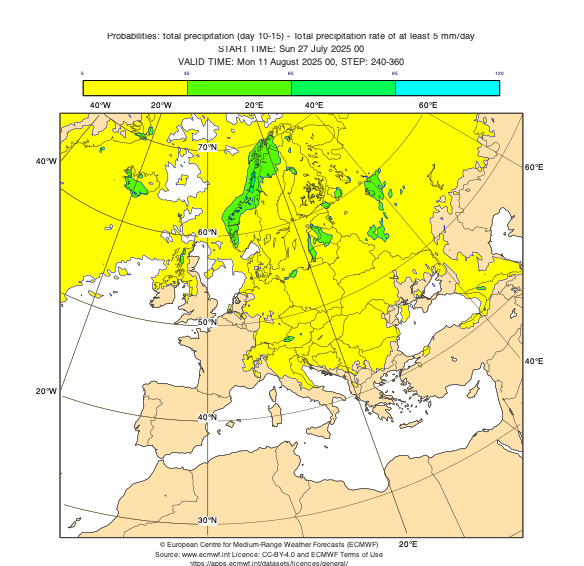

In [9]:
# define coastlines
coast = mv.mcoast(
    map_coastline_colour="charcoal",
    map_coastline_resolution="medium",
    map_coastline_land_shade="on",
    map_coastline_land_shade_colour="cream",
    map_coastline_sea_shade="off",
    map_boundaries="on",
    map_boundaries_colour= "charcoal",
    map_boundaries_thickness = 1,
    map_disputed_boundaries = "off",
    map_grid_colour="tan",
    map_label_height=0.35,
)

# define view
view = mv.geoview(
    area_mode="name",
    area_name="europe",
    coastlines=coast
)

#define styles
tprg5_shade = mv.mcont(legend= "on",
                contour_automatics_settings = "style_name",
                contour_style_name = "sh_grn_f0t100lst")

title = mv.mtext(
    text_lines = ["Probabilities: total precipitation (day 10-15) - Total precipitation rate of at least 5 mm/day",
                "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H'/> ",
                "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H' />, STEP: <grib_info key='step'/>"],
    text_font_size=0.4,
    text_colour         = 'charcoal')

ecmwf_text = mv.mtext(    
    text_lines          = ["© European Centre for Medium-Range Weather Forecasts (ECMWF)",
                           "Source: www.ecmwf.int Licence: CC-BY-4.0 and ECMWF Terms of Use",
                            "https://apps.ecmwf.int/datasets/licences/general/"],
    text_justification  = 'center',
    text_font_size      = 0.3,
    text_mode           = "positional",
    text_box_x_position = 6.,
    text_box_y_position = -0.2,
    text_box_x_length   = 8,
    text_box_y_length   = 2,
    text_colour         = 'charcoal')

# generate plot
mv.setoutput('jupyter', plot_widget=False)
mv.plot(view, tprg5, tprg5_shade, title, ecmwf_text)

To generate the png file you can run the following cell.

In [9]:
png = mv.png_output(
    output_name = "medium-tp-long-probability",    # specify relative or full path
    output_title = "medium-tp-long-probability",    # title used by a viewer
      output_width = 1000,                 # set width in pixels
)
mv.setoutput(png)
mv.plot(view, tprg5, tprg5_shade, title, ecmwf_text)

Note that plot produced using open data dataset will slightly differ from one from Open Charts. This is due to different resolution of the data.  
Open data is on 0.25x0.25 resolution, while high resolution data is 0.1x0.1 grid.